In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv("vgsales.csv")
df.head(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


### Задача 1

Постройте линейный график динамики объёма продаж всех игр жанра «Sports» в Японии. Задайте графику размер 12 на 6.

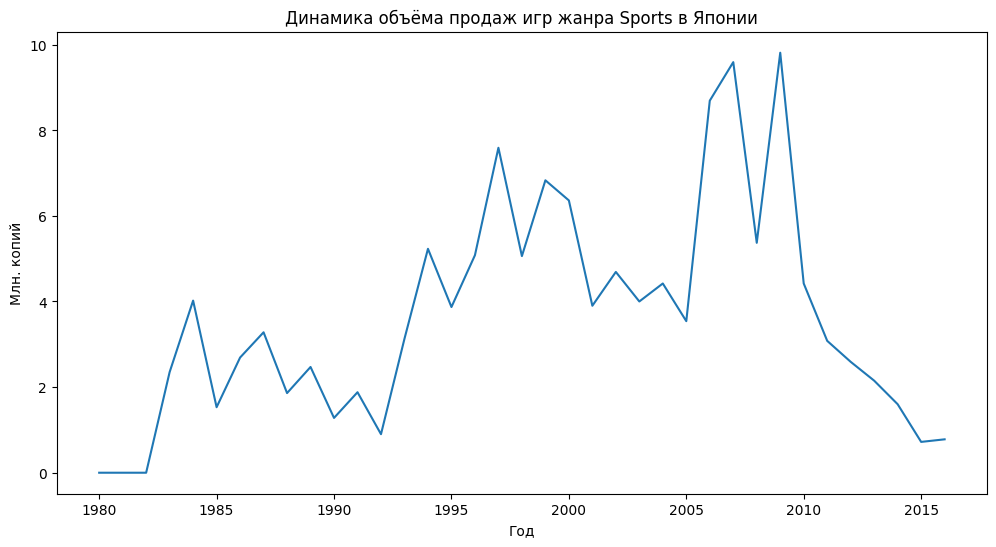

In [47]:
data = df[df["Genre"] == "Sports"].groupby("Year")["JP_Sales"].sum()
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(data)
ax.set_title("Динамика объёма продаж игр жанра Sports в Японии")
ax.set_xlabel("Год")
ax.set_ylabel("Млн. копий")
plt.show()

### Задача 2

В одних координатных осях постройте линейные графики динамики продаж студии «Activision» в Северной Америке, Европе, Японии и во всем мире.

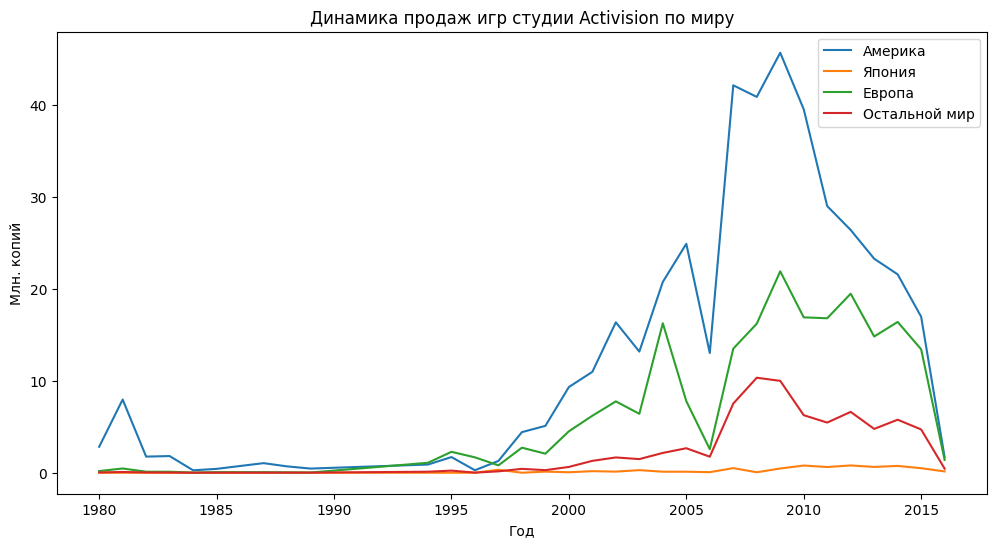

In [48]:
fig, ax = plt.subplots(figsize=(12, 6))

df_na = df[df["Publisher"] == "Activision"].groupby("Year")["NA_Sales"].sum()
df_jp = df[df["Publisher"] == "Activision"].groupby("Year")["JP_Sales"].sum()
df_eu = df[df["Publisher"] == "Activision"].groupby("Year")["EU_Sales"].sum()
df_ot = df[df["Publisher"] == "Activision"].groupby("Year")["Other_Sales"].sum()

ax.plot(df_na, label="Америка")
ax.plot(df_jp, label="Япония")
ax.plot(df_eu, label="Европа")
ax.plot(df_ot, label="Остальной мир")

ax.set_title("Динамика продаж игр студии Activision по миру")
ax.set_xlabel("Год")
ax.set_ylabel("Млн. копий")

plt.legend()
plt.show()

### Задача 3

В цикле (т.е. на разных координатных осях) постройте линейные графики динамики продаж студии «Activision» в Северной Америке, Европе, Японии и во всем мире.

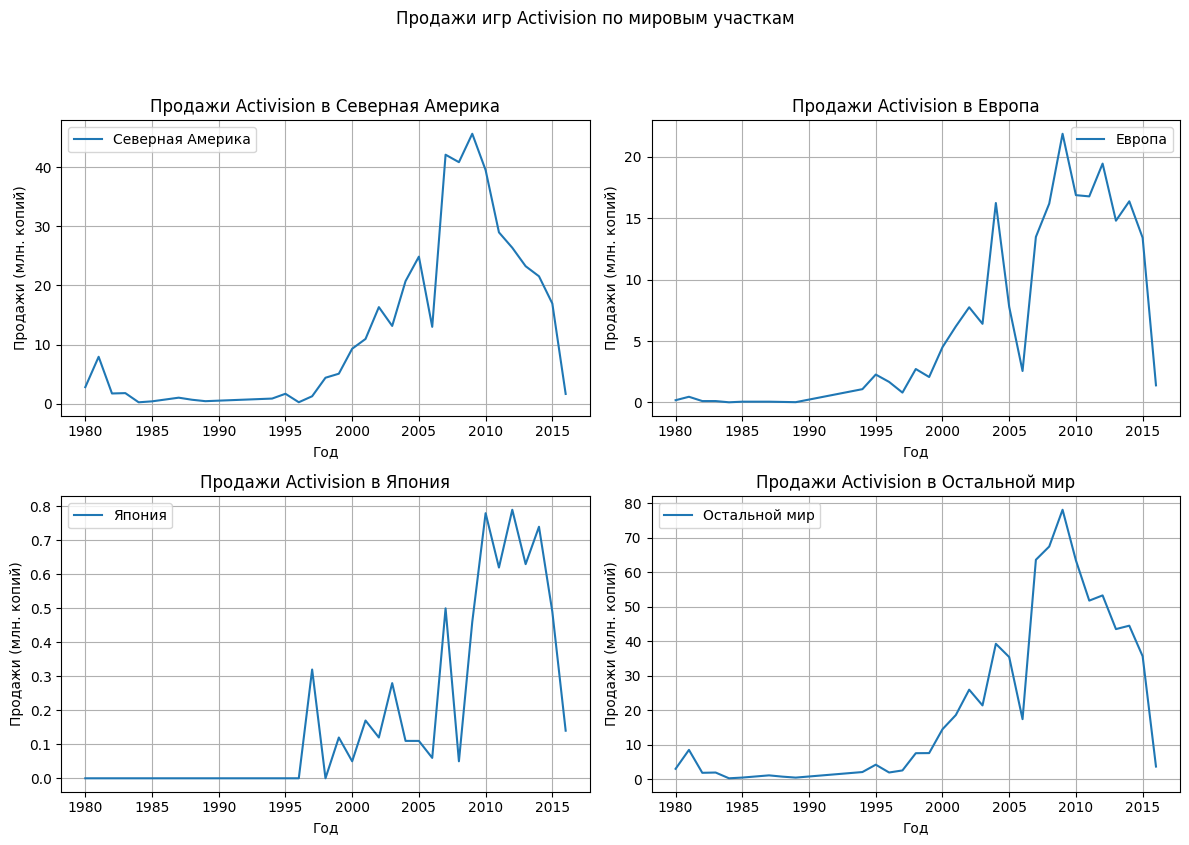

In [49]:
activision_data = df[df['Publisher'] == 'Activision']

regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']
region_names = ['Северная Америка', 'Европа', 'Япония', 'Остальной мир']

plt.figure(figsize=(12, 8))
plt.suptitle("Продажи игр Activision по мировым участкам", y=1.05)

for i, region in enumerate(regions):
    sales_by_year = activision_data.groupby('Year')[region].sum()
    plt.subplot(2, 2, i+1)
    sns.lineplot(x=sales_by_year.index, y=sales_by_year.values, label=region_names[i])
    plt.title(f'Продажи Activision в {region_names[i]}')
    plt.xlabel('Год')
    plt.ylabel('Продажи (млн. копий)')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()